In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Question 1: EDA – Telecom Customer Usage (Easy)

dataset1 = pd.read_csv("/content/Customer_Churn.csv")

print(dataset1.head(4))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year     

In [4]:
# Handle Missing Values in TotalCharges
dataset1['TotalCharges'] = pd.to_numeric(dataset1['TotalCharges'], errors='coerce')

dataset1 = dataset1.dropna(subset=['TotalCharges'])

print("Shape after cleaning:", dataset1.shape)

Shape after cleaning: (7032, 21)


In [5]:
# Engineer TenureGroup Feature
def tenure_group(tenure):
    if tenure <= 12:
        return 'Low'
    elif tenure <= 48:
        return 'Medium'
    else:
        return 'High'

dataset1['TenureGroup'] = dataset1['tenure'].apply(tenure_group)

# View counts
print("\nTenure Group Counts:\n", dataset1['TenureGroup'].value_counts())


Tenure Group Counts:
 TenureGroup
Medium    2618
High      2239
Low       2175
Name: count, dtype: int64


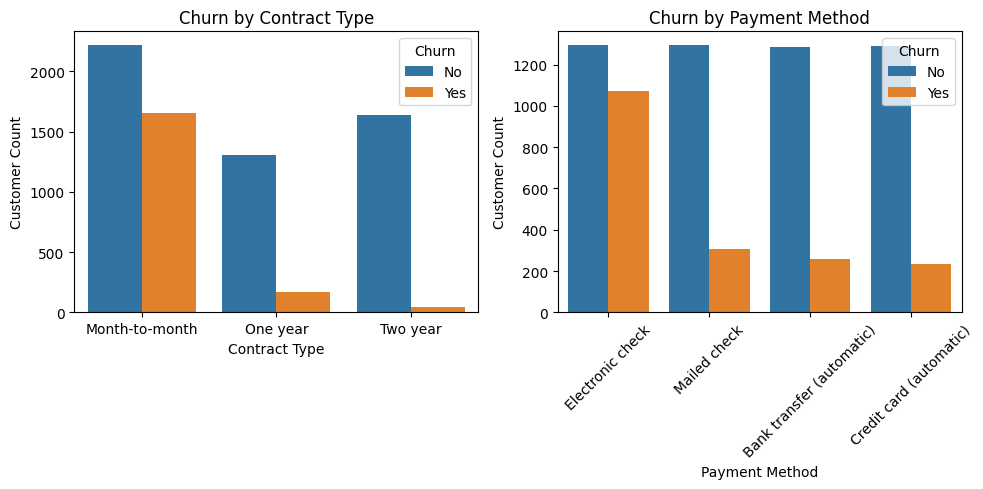

In [6]:
# Visualize Churn by Contract Type and Payment Method
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset1, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')


plt.subplot(1, 2, 2)
sns.countplot(data=dataset1, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.ylabel('Customer Count')

plt.tight_layout()
plt.show()

In [7]:
# Normalize MonthlyCharges and TotalCharges
scaler = MinMaxScaler()
dataset1[['MonthlyCharges_norm', 'TotalCharges_norm']] = scaler.fit_transform(dataset1[['MonthlyCharges', 'TotalCharges']])

print("\nNormalized Values (first 5 rows):")
print(dataset1[['MonthlyCharges', 'MonthlyCharges_norm', 'TotalCharges', 'TotalCharges_norm']].head())



Normalized Values (first 5 rows):
   MonthlyCharges  MonthlyCharges_norm  TotalCharges  TotalCharges_norm
0           29.85             0.115423         29.85           0.001275
1           56.95             0.385075       1889.50           0.215867
2           53.85             0.354229        108.15           0.010310
3           42.30             0.239303       1840.75           0.210241
4           70.70             0.521891        151.65           0.015330


In [8]:

# Question 2: Classification – Predict Customer Churn (Medium)

# First, encode the target column
dataset1['Churn'] = dataset1['Churn'].map({'Yes': 1, 'No': 0})

dataset1 = dataset1.drop('customerID', axis=1)

cat_cols = dataset1.select_dtypes(include='object').columns

dataset1_encoded = pd.get_dummies(dataset1, columns=cat_cols, drop_first=True)
dataset1_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_norm,TotalCharges_norm,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Low,TenureGroup_Medium
0,0,1,29.85,29.85,0,0.115423,0.001275,False,True,False,...,False,False,False,False,True,False,True,False,True,False
1,0,34,56.95,1889.50,0,0.385075,0.215867,True,False,False,...,False,False,True,False,False,False,False,True,False,True
2,0,2,53.85,108.15,1,0.354229,0.010310,True,False,False,...,False,False,False,False,True,False,False,True,True,False
3,0,45,42.30,1840.75,0,0.239303,0.210241,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0,2,70.70,151.65,1,0.521891,0.015330,False,False,False,...,False,False,False,False,True,False,True,False,True,False


In [9]:
from sklearn.model_selection import train_test_split

# Features and target
X = dataset1_encoded.drop('Churn', axis=1)
y = dataset1_encoded['Churn']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Train Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

lr.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [13]:
#  Evaluate using accuracy, precision, recall, F1-score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, model, X_eval, y_eval):
    y_pred = model.predict(X_eval)
    print(f"\n{name} Performance:")
    print("Accuracy :", accuracy_score(y_eval, y_pred))
    print("Precision:", precision_score(y_eval, y_pred))
    print("Recall   :", recall_score(y_eval, y_pred))
    print("F1-Score :", f1_score(y_eval, y_pred))

evaluate_model("Logistic Regression (Scaled)", lr, X_test_scaled, y_test)
evaluate_model("Decision Tree", dt, X_test, y_test)
evaluate_model("Random Forest", rf, X_test, y_test)



Logistic Regression (Scaled) Performance:
Accuracy : 0.7953091684434968
Precision: 0.6378205128205128
Recall   : 0.5320855614973262
F1-Score : 0.5801749271137027

Decision Tree Performance:
Accuracy : 0.7085998578535891
Precision: 0.45384615384615384
Recall   : 0.4732620320855615
F1-Score : 0.46335078534031415

Random Forest Performance:
Accuracy : 0.7874911158493249
Precision: 0.6237623762376238
Recall   : 0.5053475935828877
F1-Score : 0.5583456425406204


In [14]:
# Hyperparameter
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
evaluate_model("Tuned Random Forest", best_rf, X_test, y_test)
print("Best Parameters:", grid.best_params_)



Tuned Random Forest Performance:
Accuracy : 0.7889125799573561
Precision: 0.6296296296296297
Recall   : 0.5
F1-Score : 0.5573770491803278
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


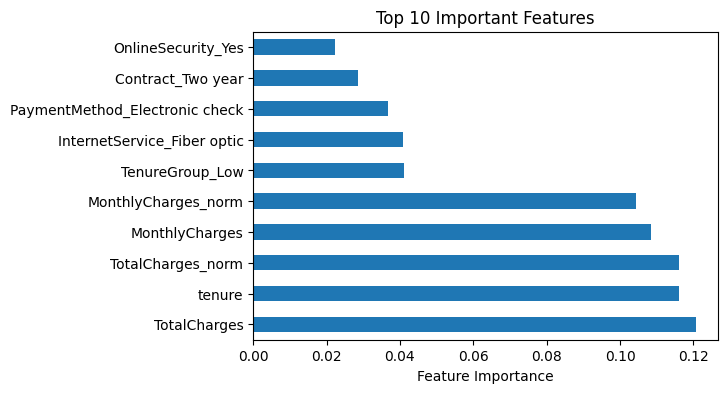

In [15]:
# Identify and explain important features.
import matplotlib.pyplot as plt

importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', figsize=(6, 4), title='Top 10 Important Features')
plt.xlabel("Feature Importance")
plt.show()
